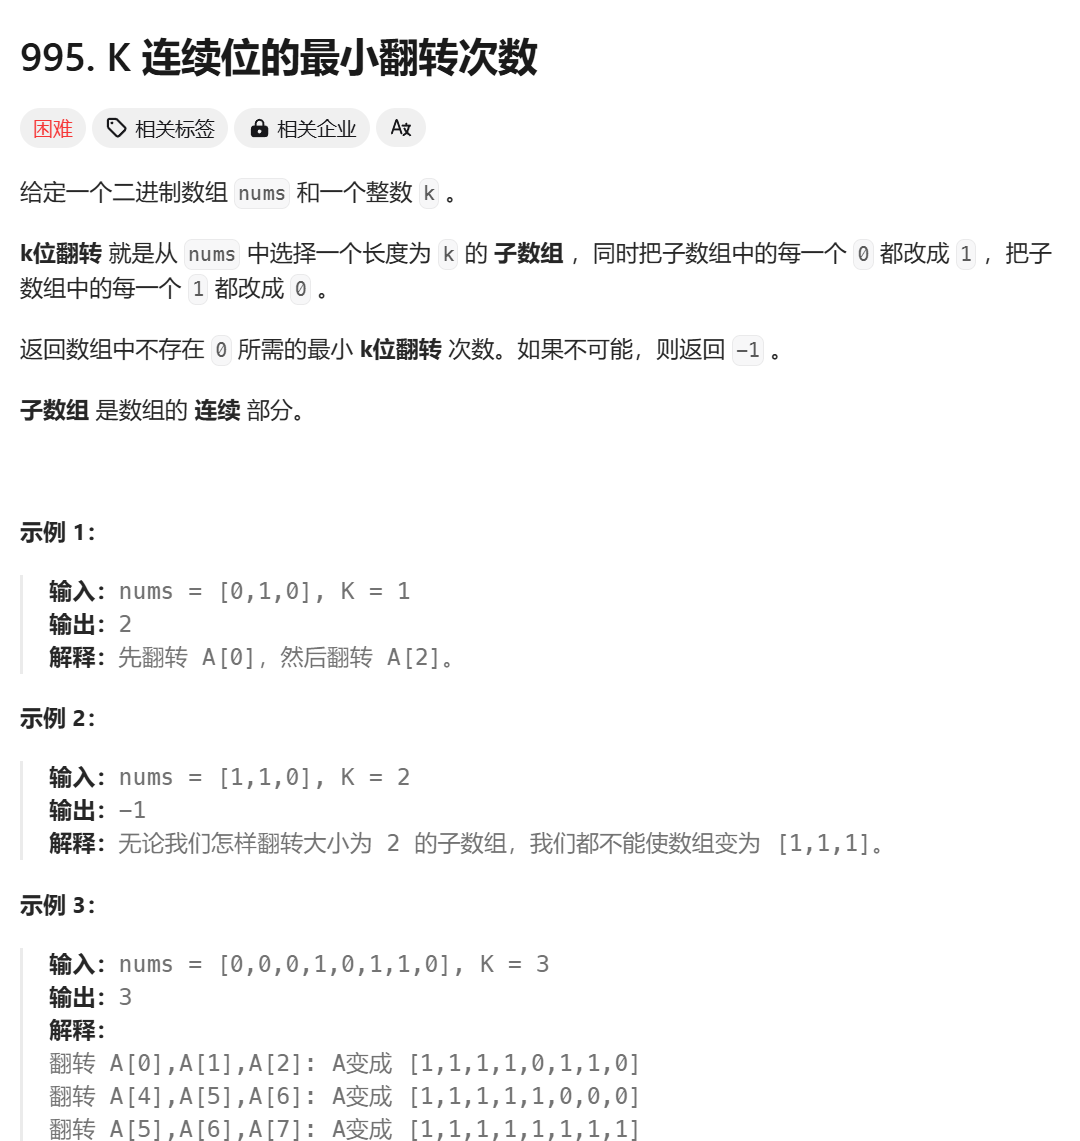

In [2]:
from collections import deque

a = deque()
a.append(1)
a.append(2)
man = a.popleft()
man

1

In [3]:
from collections import deque
from typing import List

class Solution:
    def minKBitFlips(self, nums: List[int], k: int) -> int:
        # 从贪心算法说，从左到右遍历一遍就能知道总共需要翻转多少次
        #  由于当前的元素的奇偶性只和它本身与前K-1个元素有关
        #  队列的数据结构： 先进先出
        #  队列中的元素表示从那个元素开始发生了后K个的翻转
        #  后面遇到新的元素只要统计当前队列中的元素的个数就能知道当前元素被翻转的次数
        #  是否需要翻转：A【i】+ len(queue) % 2 == 0 则翻转 （判断条件也可是 len%2 == A[i]）
        #  当 i+K > N 后面的元素就不到K个了，返回-1
        q = deque()
        N = len(nums)
        res = 0
        for i in range(N):
            # 到了一个新的元素首先要将队列中前k个之外的造成的影响给减掉
            if q and q[0] <= i -k:
                q.popleft()
            # 是否需要翻转
            if len(q) % 2 == nums[i]:
                if i + k > N: # 需要翻转但是后面的元素没有K个了
                    return -1 
                res += 1
                q.append(i)
        return res